In [13]:
!pip install scipy.io
!pip install scipy


ERROR: Could not find a version that satisfies the requirement scipy.io (from versions: none)
ERROR: No matching distribution found for scipy.io


In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
data = loadmat('Xtrain.mat')
Xtrain = data['Xtrain']  



In [3]:
data.keys()  


dict_keys(['__header__', '__version__', '__globals__', 'Xtrain'])

In [5]:
import numpy as np
def normalize_array(arr):
    norm_arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    return norm_arr
Xtrain = normalize_array(Xtrain)
Xtrain = Xtrain.ravel()
print(Xtrain)              


[0.33201581 0.54940711 0.36758893 0.1541502  0.07905138 0.07509881
 0.11857708 0.27667984 0.53754941 0.43083004 0.18181818 0.08300395
 0.06719368 0.09881423 0.22529644 0.50197628 0.50197628 0.22134387
 0.09881423 0.06719368 0.08695652 0.17391304 0.43478261 0.56126482
 0.28063241 0.11067194 0.07114625 0.06719368 0.13833992 0.35573123
 0.59288538 0.35968379 0.13438735 0.07114625 0.06324111 0.10671937
 0.27272727 0.56916996 0.45454545 0.17391304 0.08300395 0.06324111
 0.07905138 0.19762846 0.49802372 0.55335968 0.23715415 0.09486166
 0.05928854 0.06719368 0.13833992 0.38735178 0.61660079 0.33201581
 0.11857708 0.05928854 0.05928854 0.09881423 0.27667984 0.60079051
 0.45849802 0.16205534 0.07114625 0.0513834  0.07509881 0.17786561
 0.49802372 0.58498024 0.24110672 0.08695652 0.05533597 0.05928854
 0.12252964 0.35573123 0.64822134 0.36758893 0.12252964 0.05533597
 0.04743083 0.07905138 0.22134387 0.58102767 0.53359684 0.18972332
 0.07114625 0.0513834  0.05533597 0.13043478 0.41106719 0.6600

In [6]:
import numpy as np
print(np.mean(Xtrain, axis=0))  # Mean of each column (if it's a 2D matrix)
print(np.std(Xtrain, axis=0))   # Standard deviation of each column


0.22883003952569173
0.1851857226641462


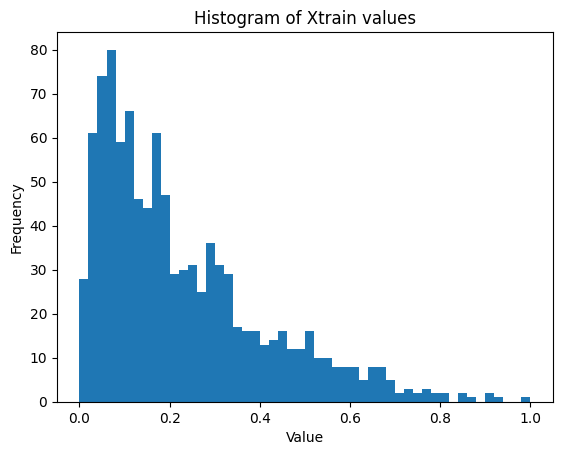

In [7]:
plt.hist(Xtrain.flatten(), bins=50)
plt.title("Histogram of Xtrain values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [9]:
mean_value = np.mean(Xtrain)
std_dev = np.std(Xtrain)
min_value = np.min(Xtrain)
max_value = np.max(Xtrain)

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Min Value: {min_value}")
print(f"Max Value: {max_value}")


Mean: 0.22883003952569173
Standard Deviation: 0.1851857226641462
Min Value: 0.0
Max Value: 1.0


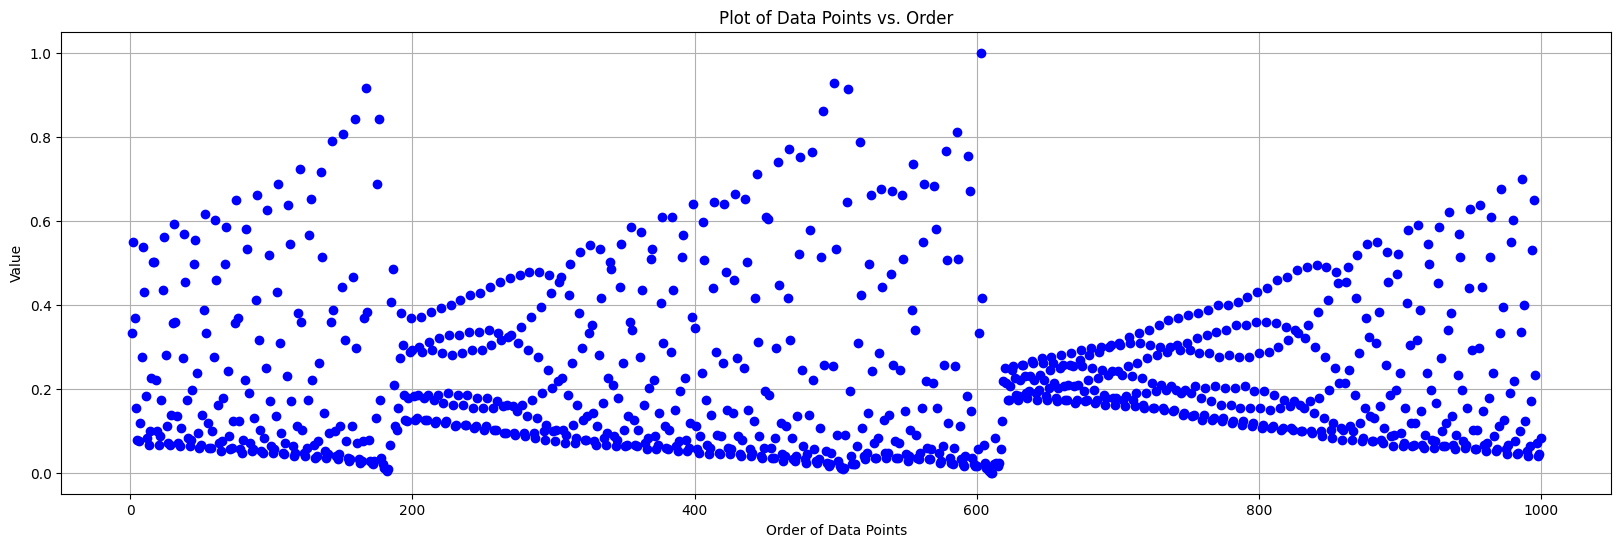

In [10]:

x_values = np.arange(1, len(Xtrain) + 1) 


plt.figure(figsize=(20, 6))
plt.plot(x_values, Xtrain, marker='o', color='b', linestyle='None', label='Data points')
plt.xlabel('Order of Data Points')
plt.ylabel('Value')
plt.title('Plot of Data Points vs. Order')
plt.grid(True)
plt.show()


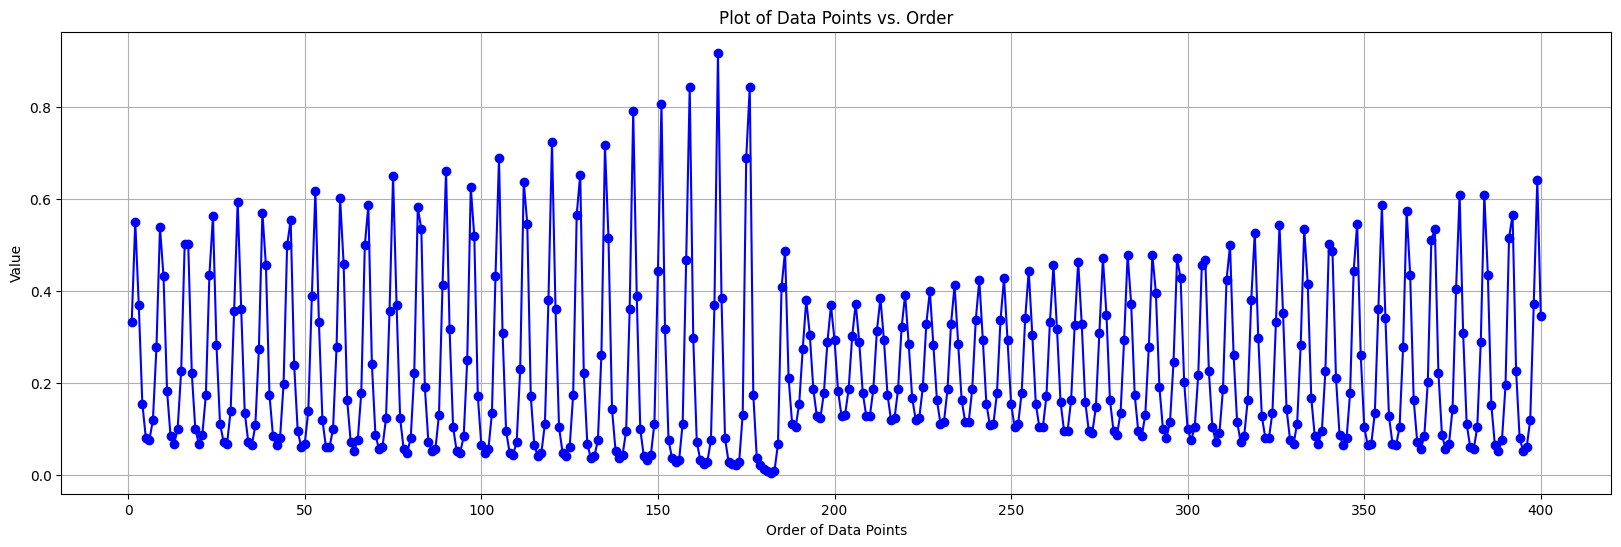

In [11]:

x_values = np.arange(1, len(Xtrain) + 1) 
x_subset = x_values[:400]
y_subset = Xtrain[:400]

plt.figure(figsize=(20, 6))
plt.plot(x_subset, y_subset, marker='o', color='b', linestyle='-', label='Data points')
plt.xlabel('Order of Data Points')
plt.ylabel('Value')
plt.title('Plot of Data Points vs. Order')
plt.grid(True)
plt.show()


In [ ]:
import tensforflow as tf


ModuleNotFoundError: No module named 'tensforflow'